# Data Analysis 

## Loading our Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import CubicSpline
import numpy as np

## Loading our Dataset

In [2]:
# forecast and ev estimations
t_load = pd.read_csv("sdge_30.csv")
ev = pd.read_csv("evavail.csv")

In [3]:
# hr load
load = pd.read_csv("hr_load.csv")
load['Datetime'] = pd.to_datetime(load['Datetime'])

In [4]:
# hr load data loaded in
load.head()

,HR,PGE,SCE,SDGE,VEA,CAISO,Datetime
0,1,9762.24,9423.63,2051.81,64.48,21302.16,2023-01-01 01:00:00
1,2,9705.41,9047.39,1987.57,63.39,20803.75,2023-01-01 02:00:00
2,3,9539.15,8795.72,1900.54,64.67,20300.08,2023-01-01 03:00:00
3,4,9372.68,8583.53,1893.32,65.39,19914.92,2023-01-01 04:00:00
4,5,9438.79,8612.09,1859.29,65.67,19975.84,2023-01-01 05:00:00


In [5]:
# forecast data
t_load.head()

,YEAR,MONTH,DAY,HOUR,UNADJUSTED_CONSUMPTION,PUMPING,CLIMATE_CHANGE,LIGHT_EV,MEDIUM_HEAVY_EV,OTHER_ADJUSTMENTS,BASELINE_CONSUMPTION,BTM_PV,BTM_STORAGE_RES,BTM_STORAGE_NONRES,BASELINE_NET_LOAD,AAEE,AAFS,AATE_LDV,AATE_MDHD,MANAGED_NET_LOAD
0,2023,1,1,1,2062,0,0,24,0,0,2086,0,0,0,2086,0,0,0,2,2088
1,2023,1,1,2,1984,0,0,24,0,0,2008,0,0,0,2008,0,0,0,2,2010
2,2023,1,1,3,1924,0,0,18,0,0,1941,0,0,0,1941,0,0,0,1,1942
3,2023,1,1,4,1891,0,0,12,0,0,1902,0,0,0,1902,0,0,0,1,1903
4,2023,1,1,5,1912,0,0,7,0,0,1919,0,0,0,1919,0,0,0,1,1919


In [6]:
# available evs
ev.head()

,hour,sd_ev_week,sd_ev_weekend,sd_ev_week2030,sd_ev_weekend2030
0,0,67243.273810,67128.287888,336046.875000,335472.235225
1,1,67218.183036,67088.823874,335921.484375,335275.014628
2,2,67255.819196,67049.359860,336109.570312,335077.794032
3,3,67180.546875,67049.359860,335733.398438,335077.794032
4,4,66377.642113,66891.503803,331720.898438,334288.911644


In [7]:
# converting to datetime
load['Datetime'] = pd.to_datetime(load['Datetime'])

# Extracting year, month, and hour
load['year'] = load['Datetime'].dt.year
load['month'] = load['Datetime'].dt.month
load['hour'] = load['Datetime'].dt.hour
load['month_name'] = load['Datetime'].dt.strftime('/%B')

In [8]:
# mean for each hour per month
month_hourly_avg = load.groupby(['month', 'hour'])['SDGE'].mean().reset_index()

## Visualizations

In [9]:
# SDGE Visualization
custom_palette = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
                  '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
                  '#008080', '#e6beff']

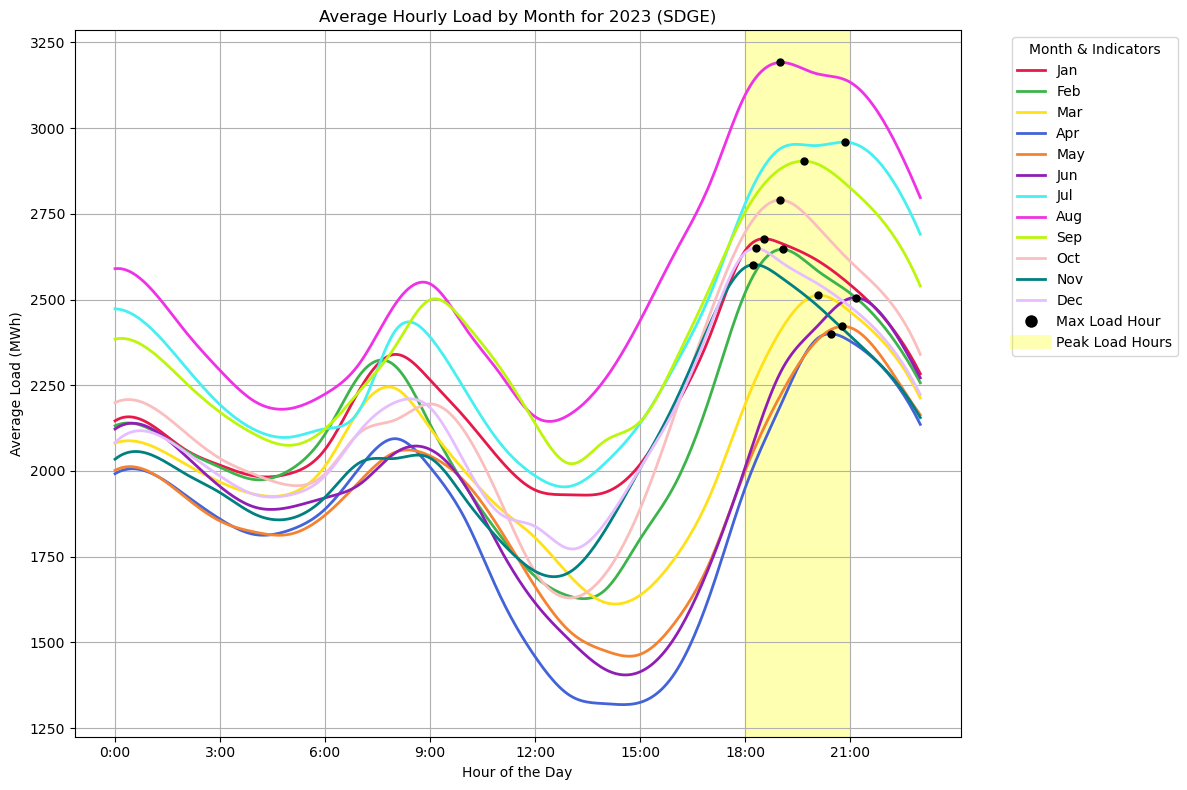

In [10]:
# dictionary to map the month number to the color
month_to_color = {month: color for month, color in zip(month_hourly_avg['month'].unique(), custom_palette)}

# Initialize the figure
plt.figure(figsize=(12, 8))

# Store handles for the legend
lines = []

# Plot each month's line with interpolated values using the mapped colors
for month in month_hourly_avg['month'].unique():
    df_month = month_hourly_avg[month_hourly_avg['month'] == month]
    month_name = pd.to_datetime(f'2023-{month}-01').strftime('%b')

    # Prepare data for interpolation
    x = df_month['hour']
    y = df_month['SDGE']
    
    # Cubic spline interpolation
    cs = CubicSpline(x, y)
    x_new = np.linspace(x.min(), x.max(), 300)  # More points for a smoother line
    y_new = cs(x_new)

    # Plot the interpolated line
    line, = plt.plot(x_new, y_new, linestyle='-', linewidth=2, color=month_to_color[month], label=month_name)
    lines.append(line)

    # Find the hour with maximum load
    max_load_index = np.argmax(y_new)  # Index of max load in the interpolated data
    plt.scatter(x_new[max_load_index], y_new[max_load_index], color='black', s=25, zorder=5)

# Add legend entries
red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Max Load Hour')
lines.append(red_dot)
peak_hours = plt.Line2D([0], [0], color='yellow', lw=10, label='Peak Load Hours', alpha=0.3)
lines.append(peak_hours)

# Highlight the peak hour period from 18 to 21
plt.axvspan(18, 21, color='yellow', alpha=0.3)

# Plot settings
plt.title('Average Hourly Load by Month for 2023 (SDGE)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Load (MWh)')
plt.xticks(np.arange(0, 24, 3), [f'{h}:00' for h in np.arange(0, 24, 3)])  # Only show every third hour
plt.legend(handles=lines, title='Month & Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

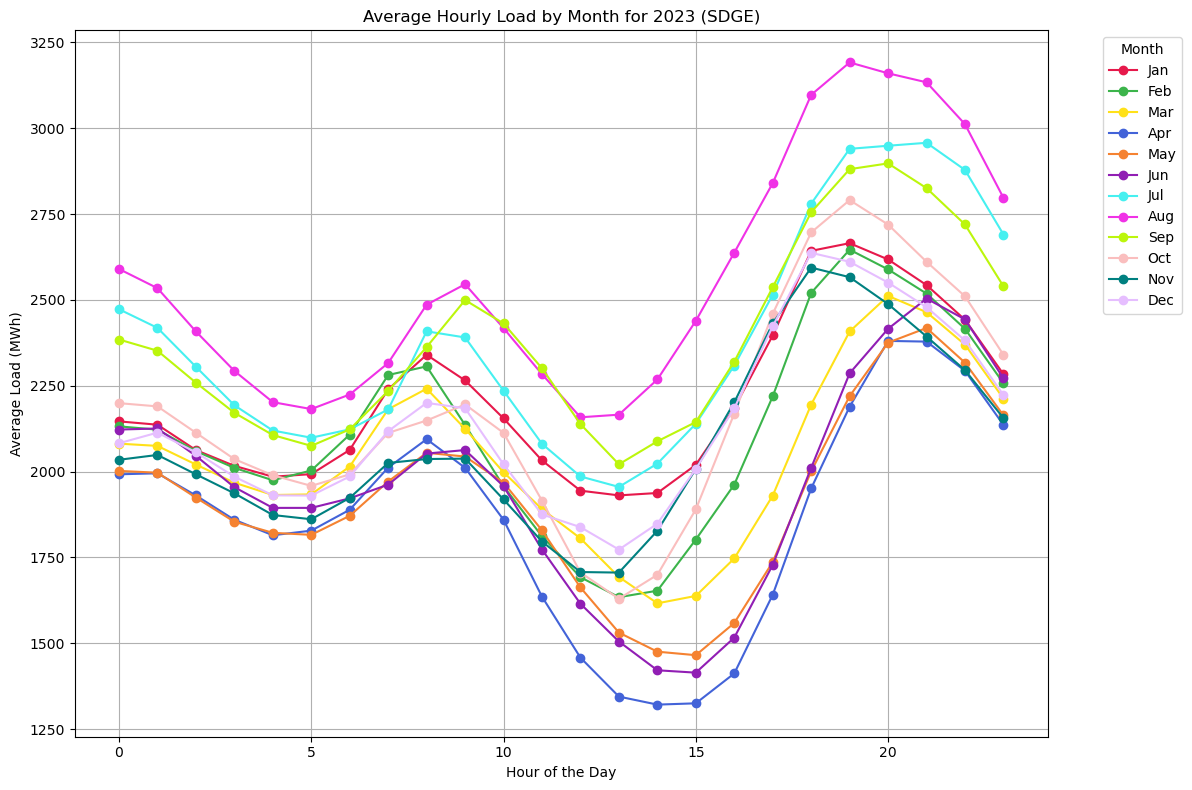

In [11]:
# SDGE Visualization
custom_palette = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
                  '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
                  '#008080', '#e6beff']

# Create a dictionary to map the month number to the color
month_to_color = {month: color for month, color in zip(month_hourly_avg['month'].unique(), custom_palette)}

# Initialize the figure
plt.figure(figsize=(12, 8))

# Plot each month's line with its specific color from the custom palette and include line and dot marker
lines = []  # List to hold line objects for the legend
for month in month_hourly_avg['month'].unique():
    df_month = month_hourly_avg[month_hourly_avg['month'] == month]
    month_name = pd.to_datetime(f'2023-{month}-01').strftime('%b')
    line, = plt.plot(df_month['hour'], df_month['SDGE'], marker='o', linestyle='-', color=month_to_color[month], label=month_name)
    lines.append(line)

# Create the legend
plt.legend(handles=lines, title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the title and labels
plt.title('Average Hourly Load by Month for 2023 (SDGE)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Load (MWh)')
plt.grid(True)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
# Create a datetime column from the year, month, day, and hour columns
t_load['DateTime'] = pd.to_datetime(t_load[['YEAR', 'MONTH', 'DAY', 'HOUR']], 
                                format='%Y %m %d %H')

In [13]:
# Creating new dataframe with only the important columns from forecast
load30 = t_load[['DateTime', 'BASELINE_CONSUMPTION','LIGHT_EV','MEDIUM_HEAVY_EV','UNADJUSTED_CONSUMPTION']]

In [14]:
# Checking
load30.head()

,DateTime,BASELINE_CONSUMPTION,LIGHT_EV,MEDIUM_HEAVY_EV,UNADJUSTED_CONSUMPTION
0,2023-01-01 01:00:00,2086,24,0,2062
1,2023-01-01 02:00:00,2008,24,0,1984
2,2023-01-01 03:00:00,1941,18,0,1924
3,2023-01-01 04:00:00,1902,12,0,1891
4,2023-01-01 05:00:00,1919,7,0,1912


In [15]:
# saving dataframe
#load30.to_csv('sdgeload30.csv',index=False)

In [16]:
# Extracting year, month, and hour
load30['year'] = load30['DateTime'].dt.year
load30['month'] = load30['DateTime'].dt.month
load30['hour'] = load30['DateTime'].dt.hour


C:\Users\Eybar\AppData\Local\Temp\ipykernel_2556\4279515053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load30['year'] = load30['DateTime'].dt.year
C:\Users\Eybar\AppData\Local\Temp\ipykernel_2556\4279515053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load30['month'] = load30['DateTime'].dt.month
C:\Users\Eybar\AppData\Local\Temp\ipykernel_2556\4279515053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [17]:
# Extracting y,m,h for calculations later on
load30.head()

,DateTime,BASELINE_CONSUMPTION,LIGHT_EV,MEDIUM_HEAVY_EV,UNADJUSTED_CONSUMPTION,year,month,hour
0,2023-01-01 01:00:00,2086,24,0,2062,2023,1,1
1,2023-01-01 02:00:00,2008,24,0,1984,2023,1,2
2,2023-01-01 03:00:00,1941,18,0,1924,2023,1,3
3,2023-01-01 04:00:00,1902,12,0,1891,2023,1,4
4,2023-01-01 05:00:00,1919,7,0,1912,2023,1,5


In [18]:
# making sure forecast data is usable
load30.dtypes

DateTime                  datetime64[ns]
BASELINE_CONSUMPTION               int64
LIGHT_EV                           int64
MEDIUM_HEAVY_EV                    int64
UNADJUSTED_CONSUMPTION             int64
year                               int32
month                              int32
hour                               int32
dtype: object

In [19]:
# Filter data for the years 2030 and 2023
load_2030 = load30[load30['DateTime'].dt.year == 2030]
load_2023 = load30[load30['DateTime'].dt.year == 2023]

In [20]:
# means for 23 and 30 forecast data
month_hourly_avg = load_2030.groupby(['month', 'hour'])['BASELINE_CONSUMPTION'].mean().reset_index()
light_ev_avg = load_2030.groupby(['month', 'hour'])['LIGHT_EV'].mean().reset_index()
month_hourly_avgs = load_2023.groupby(['month', 'hour'])['BASELINE_CONSUMPTION'].mean().reset_index()
light_ev_avgs = load_2023.groupby(['month', 'hour'])['LIGHT_EV'].mean().reset_index()

## Calculations for forecast

In [21]:
# Filter data for the years 2030 and 2023
#load_2030 = load30[load30['DateTime'].dt.year == 2030]
#load_2023 = load30[load30['DateTime'].dt.year == 2023]

# Group by month and calculate the average baseline consumption for each month
monthly_avg_2030 = load_2030.groupby(load_2030['DateTime'].dt.month)['BASELINE_CONSUMPTION'].mean()
monthly_avg_2023 = load_2023.groupby(load_2023['DateTime'].dt.month)['BASELINE_CONSUMPTION'].mean()

# Group by month for the 'load' DataFrame and calculate the average 'SDGE' consumption
actual_avg_2023 = load.groupby(load['Datetime'].dt.month)['SDGE'].mean()

percent_increase_2330 = ((monthly_avg_2030 - monthly_avg_2023) / monthly_avg_2023 * 100)
assump_avg_2030 = actual_avg_2023 + (actual_avg_2023 * (percent_increase_2330 / 100))

# Calculate the difference between the averages of 2030 and 2023
difference = monthly_avg_2030 - monthly_avg_2023

dif_23 = ((actual_avg_2023 - monthly_avg_2023) / actual_avg_2023 * 100)

# Calculate the percentage change
percentage_change = (difference / monthly_avg_2030) * 100

# Create a DataFrame to compare both years easily
comparison_df = pd.DataFrame({
    'Actual Consumption 2023': actual_avg_2023,
    'CEC Assumption Consumption 2023': monthly_avg_2023,
    'Forecast Consumption 2030': assump_avg_2030,
    'CEC Assumption Consumption 2030': monthly_avg_2030
})

# Display the comparison DataFrame
print(comparison_df)

    Actual Consumption 2023  CEC Assumption Consumption 2023  \
1               2210.114946                      2431.869448   
2               2117.121667                      2422.053571   
3               2043.799771                      2383.513441   
4               1864.573931                      2341.150000   
5               1919.788441                      2389.942204   
6               1954.046069                      2604.769444   
7               2381.248078                      2920.431452   
8               2557.657500                      3101.477151   
9               2381.958333                      3013.783333   
10              2174.329261                      2643.850806   
11              2077.341727                      2454.640278   
12              2143.264489                      2490.321237   

    Forecast Consumption 2030  CEC Assumption Consumption 2030  
1                 2559.171427                      2815.948925  
2                 2476.990206        

In [22]:
# Calculate the difference between the averages of 2030 and 2023
difference = monthly_avg_2030 - monthly_avg_2023

# Calculate the percentage change
percentage_change = (difference / monthly_avg_2030) * 100

# Create a DataFrame to display the percentage change for easier visualization
percentage_change_df = pd.DataFrame({
    'Percentage Change': percentage_change
})

# Display the DataFrame with percentage changes
print(percentage_change_df)

          Percentage Change
DateTime                   
1                 13.639433
2                 14.528460
3                 13.939304
4                 14.552671
5                 14.341795
6                 13.977547
7                 13.427808
8                 13.040829
9                 13.445358
10                13.692034
11                14.251162
12                13.759605


In [23]:
# Will apply this percentage increase to create own forecast
percent_increase_2330 = ((monthly_avg_2030 - monthly_avg_2023) / monthly_avg_2023 * 100)
print(percent_increase_2330)

DateTime
1     15.793589
2     16.998009
3     16.197062
4     17.031160
5     16.743049
6     16.248719
7     15.510532
8     14.996496
9     15.533954
10    15.864160
11    16.619656
12    15.954942
Name: BASELINE_CONSUMPTION, dtype: float64


In [24]:
# diffrence between the what actually occur to the forecast in 23
dif_23 = ((actual_avg_2023 - monthly_avg_2023) / actual_avg_2023 * 100)
print(dif_23)

Datetime
1    -10.033618
2    -14.403136
3    -16.621671
4    -25.559516
5    -24.489874
6    -33.301332
7    -22.642890
8    -21.262411
9    -26.525443
10   -21.593857
11   -18.162565
12   -16.192903
dtype: float64


In [25]:
# applying the percentage change
assump_avg_2030 = actual_avg_2023 + (actual_avg_2023 * (percent_increase_2330 / 100))
print(assump_avg_2030)

Datetime
1     2559.171427
2     2476.990206
3     2374.835279
4     2182.132498
5     2241.219560
6     2271.553524
7     2750.592329
8     2941.216510
9     2751.970650
10    2519.268341
11    2422.588783
12    2485.221088
dtype: float64


In [26]:
# Define colors for each group of columns
color1 = 'skyblue'
color2 = 'palegreen'
color3 = 'blue'
color4 = 'green'

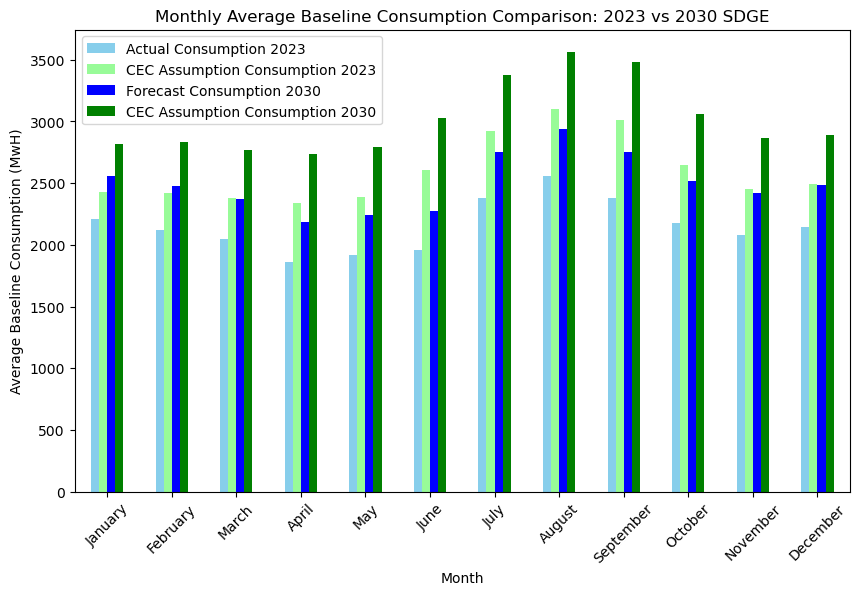

In [27]:
comparison_df.plot(kind='bar', figsize=(10, 6), color=[color1, color2, color3, color4])
plt.title('Monthly Average Baseline Consumption Comparison: 2023 vs 2030 SDGE')
plt.xlabel('Month')
plt.ylabel('Average Baseline Consumption (MwH)')
plt.xticks(ticks=range(0, 12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
], rotation=45)
plt.legend()
plt.show()

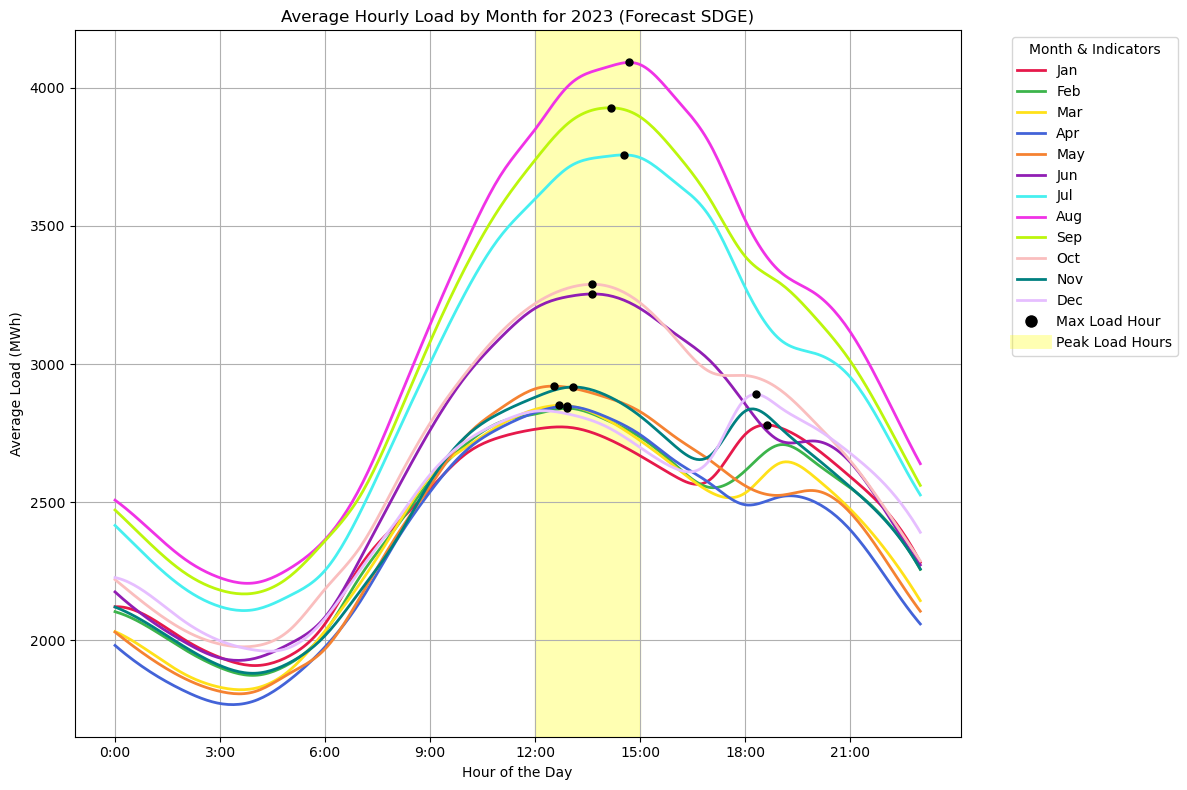

In [28]:
# 2023 Forecast data
month_to_color = {month: color for month, color in zip(month_hourly_avgs['month'].unique(), custom_palette)}

# Initialize the figure
plt.figure(figsize=(12, 8))

# Store handles for the legend
lines = []

# Plot each month's line with interpolated values
for month in month_hourly_avgs['month'].unique():
    df_month = month_hourly_avgs[month_hourly_avgs['month'] == month]
    month_name = pd.to_datetime(f'2023-{month}-01').strftime('%b')

    # Prepare data for interpolation
    x = df_month['hour']
    y = df_month['BASELINE_CONSUMPTION']
    
    # Cubic spline interpolation
    cs = CubicSpline(x, y)
    x_new = np.linspace(x.min(), x.max(), 300)  # More points for a smoother line
    y_new = cs(x_new)

    # Plot the interpolated line
    line, = plt.plot(x_new, y_new, linestyle='-', linewidth=2, color=month_to_color[month], label=month_name)
    lines.append(line)

    # Find the hour with maximum load
    max_load_index = np.argmax(y_new)  # Index of max load in the interpolated data
    plt.scatter(x_new[max_load_index], y_new[max_load_index], color='black', s=25, zorder=5)

# Add legend entry for the red dot
red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Max Load Hour')
lines.append(red_dot)

# Highlight the peak hour period from 12 to 3
plt.axvspan(12, 15, color='yellow', alpha=0.3, label='Peak Load Hours')

# Adding custom legend entries
peak_hours = plt.Line2D([0], [0], color='yellow', lw=10, alpha=0.3, label='Peak Load Hours')
lines.append(peak_hours)

# Plot settings
plt.title('Average Hourly Load by Month for 2023 (Forecast SDGE)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Load (MWh)')
plt.xticks(np.arange(0, 24, 3), [f'{h}:00' for h in np.arange(0, 24, 3)])  # Only show every third hour
plt.legend(handles=lines, title='Month & Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

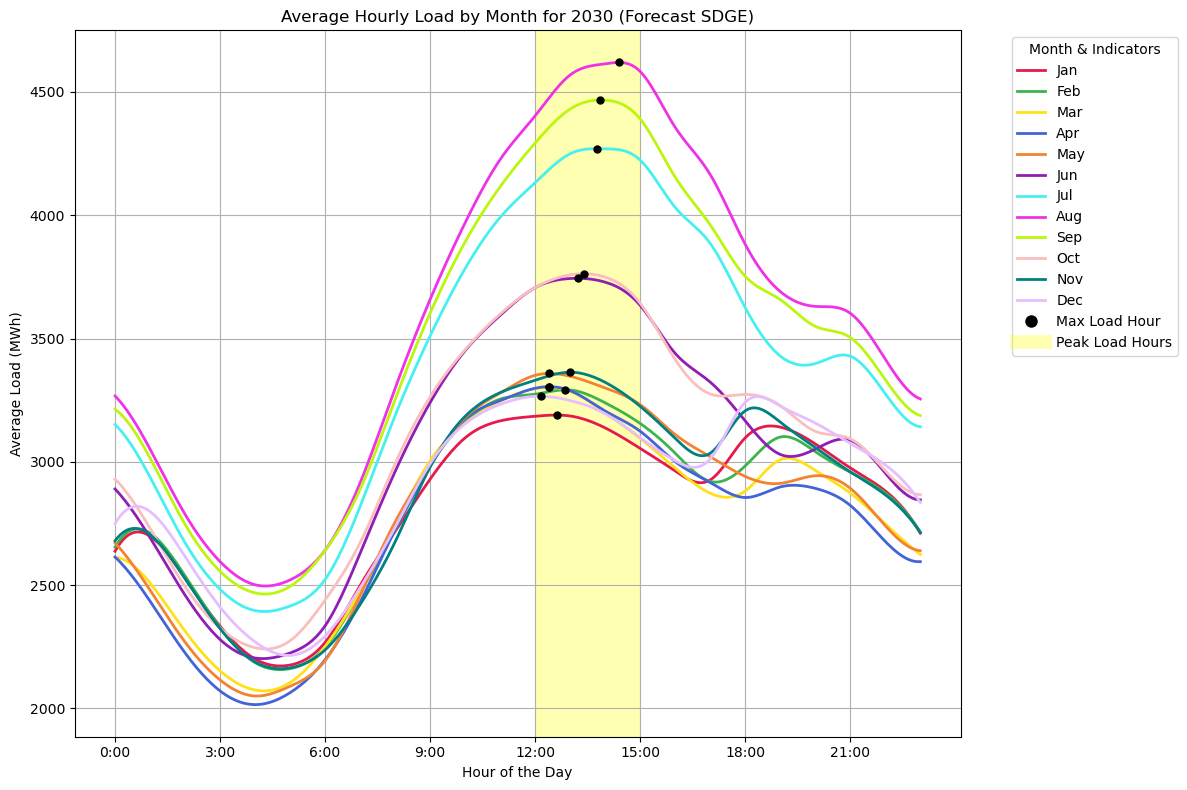

In [29]:
# 2030 forecast data
custom_palette = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
                  '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
                  '#008080', '#e6beff']

# Create a dictionary to map the month number to the color
month_to_color = {month: color for month, color in zip(month_hourly_avg['month'].unique(), custom_palette)}

# Initialize the figure
plt.figure(figsize=(12, 8))

# Store handles for the legend
lines = []

# Plot each month's line with interpolated values using the mapped colors
for month in month_hourly_avg['month'].unique():
    df_month = month_hourly_avg[month_hourly_avg['month'] == month]
    month_name = pd.to_datetime(f'2023-{month}-01').strftime('%b')

    # Prepare data for interpolation
    x = df_month['hour']
    y = df_month['BASELINE_CONSUMPTION']
    
    # Cubic spline interpolation
    cs = CubicSpline(x, y)
    x_new = np.linspace(x.min(), x.max(), 300)  # More points for a smoother line
    y_new = cs(x_new)

    # Plot the interpolated line
    line, = plt.plot(x_new, y_new, linestyle='-', linewidth=2, color=month_to_color[month], label=month_name)
    lines.append(line)

    # Find the hour with maximum load
    max_load_index = np.argmax(y_new)  # Index of max load in the interpolated data
    plt.scatter(x_new[max_load_index], y_new[max_load_index], color='black', s=25, zorder=5)

# Add legend entry for the red dot
red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='Max Load Hour')
lines.append(red_dot)

# Highlight the peak hour period from 18 to 21
plt.axvspan(12, 15, color='yellow', alpha=0.3, label='Peak Load Hours')

# Adding custom legend entries
peak_hours = plt.Line2D([0], [0], color='yellow', lw=10, label='Peak Load Hours', alpha=0.3)
lines.append(peak_hours)

# Plot settings
plt.title('Average Hourly Load by Month for 2030 (Forecast SDGE)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Load (MWh)')
plt.xticks(np.arange(0, 24, 3), [f'{h}:00' for h in np.arange(0, 24, 3)])  # Only show every third hour
plt.legend(handles=lines, title='Month & Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

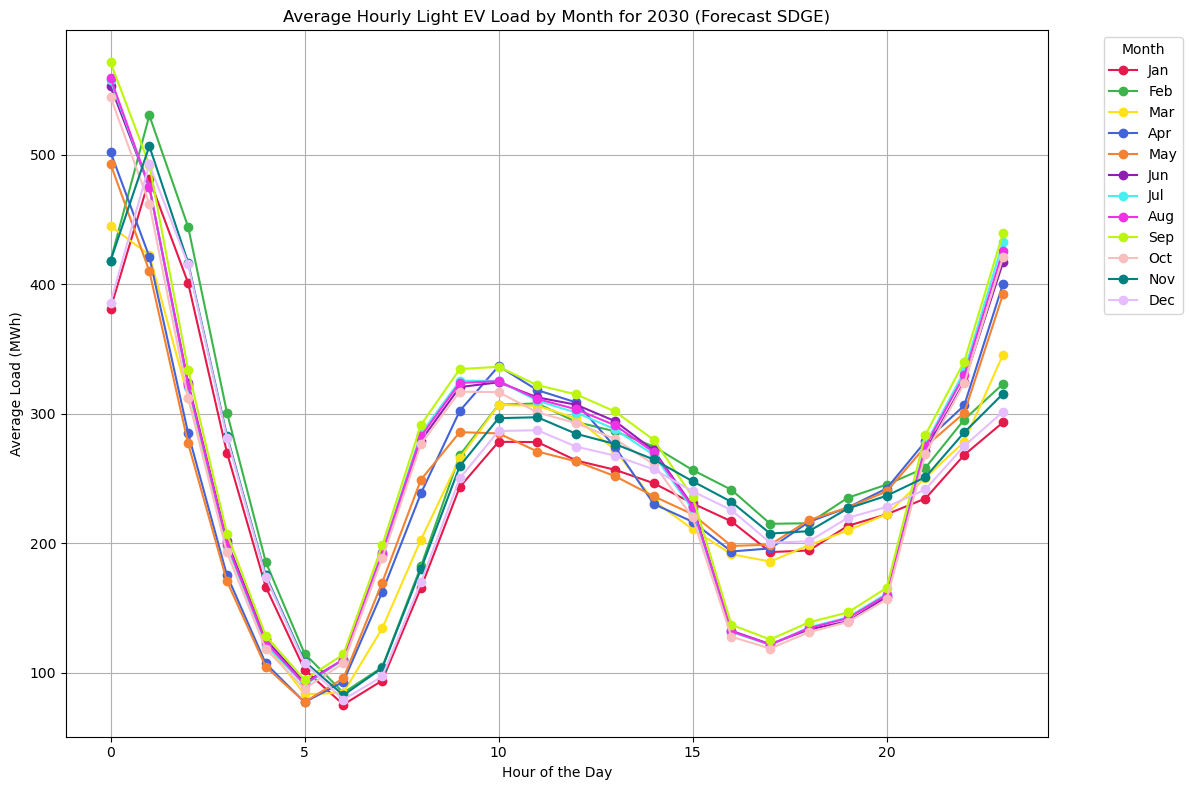

In [30]:
# SDGE Visualization
custom_palette = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
                  '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
                  '#008080', '#e6beff']

# Create a dictionary to map the month number to the color
month_to_color = {month: color for month, color in zip(month_hourly_avg['month'].unique(), custom_palette)}

# Initialize the figure
plt.figure(figsize=(12, 8))

# Plot each month's line with its specific color from the custom palette and include line and dot marker
lines = []  # List to hold line objects for the legend
for month in light_ev_avg['month'].unique():
    df_month = light_ev_avg[light_ev_avg['month'] == month]
    month_name = pd.to_datetime(f'2023-{month}-01').strftime('%b')
    line, = plt.plot(df_month['hour'], df_month['LIGHT_EV'], marker='o', linestyle='-', color=month_to_color[month], label=month_name)
    lines.append(line)

# Create the legend
plt.legend(handles=lines, title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the title and labels
plt.title('Average Hourly Light EV Load by Month for 2030 (Forecast SDGE)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Load (MWh)')
plt.grid(True)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

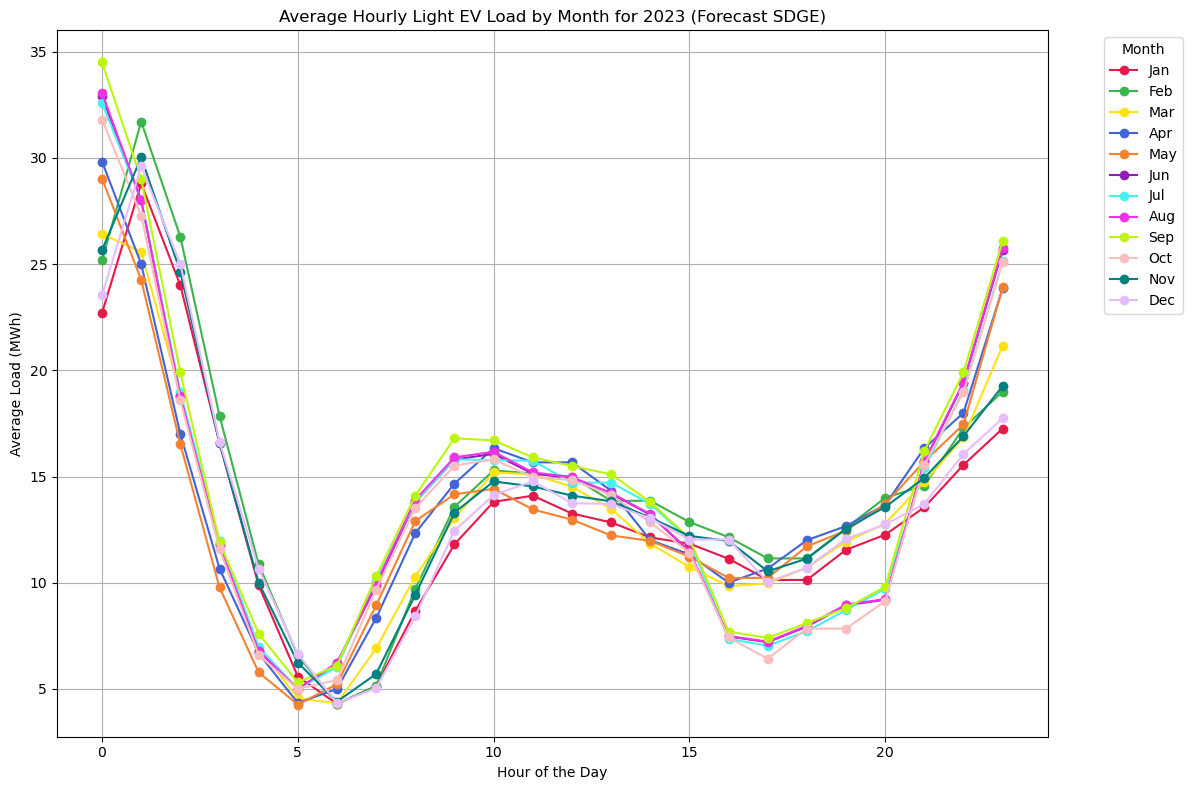

In [31]:
# SDGE Visualization
custom_palette = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
                  '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
                  '#008080', '#e6beff']

# Create a dictionary to map the month number to the color
month_to_color = {month: color for month, color in zip(month_hourly_avg['month'].unique(), custom_palette)}

# Initialize the figure
plt.figure(figsize=(12, 8))

# Plot each month's line with its specific color from the custom palette and include line and dot marker
lines = []  # List to hold line objects for the legend
for month in light_ev_avgs['month'].unique():
    df_month = light_ev_avgs[light_ev_avgs['month'] == month]
    month_name = pd.to_datetime(f'2023-{month}-01').strftime('%b')
    line, = plt.plot(df_month['hour'], df_month['LIGHT_EV'], marker='o', linestyle='-', color=month_to_color[month], label=month_name)
    lines.append(line)

# Create the legend
plt.legend(handles=lines, title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the title and labels
plt.title('Average Hourly Light EV Load by Month for 2023 (Forecast SDGE)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Load (MWh)')
plt.grid(True)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
# Apply percentage increase to create own 2030 projections
sdge_df = load[['Datetime', 'SDGE']]
sdge_df['month'] = sdge_df['Datetime'].dt.month
sdge_df['hour'] = sdge_df['Datetime'].dt.hour

# Monthly percent increase values
percent_increase_2330 = {
    1: 15.793589,
    2: 16.998009,
    3: 16.197062,
    4: 17.031160,
    5: 16.743049,
    6: 16.248719,
    7: 15.510532,
    8: 14.996496,
    9: 15.533954,
    10: 15.864160,
    11: 16.619656,
    12: 15.954942
}

# Apply the percent increase to each observation
sdge_df['percent_increase'] = sdge_df['month'].map(percent_increase_2330)
sdge_df['SDGE_2030'] = sdge_df['SDGE'] * (1 + sdge_df['percent_increase'] / 100)

# Check the result
print(sdge_df[['Datetime', 'SDGE', 'SDGE_2030']])


                Datetime     SDGE    SDGE_2030
0    2023-01-01 01:00:00  2051.81  2375.864438
1    2023-01-01 02:00:00  1987.57  2301.478637
2    2023-01-01 03:00:00  1900.54  2200.703476
3    2023-01-01 04:00:00  1893.32  2192.343179
4    2023-01-01 05:00:00  1859.29  2152.938621
...                  ...      ...          ...
8755 2023-12-31 20:00:00  2440.56  2829.949932
8756 2023-12-31 21:00:00  2347.11  2721.590039
8757 2023-12-31 22:00:00  2264.49  2625.788066
8758 2023-12-31 23:00:00  2160.48  2505.183331
8759 2024-01-01 00:00:00  2061.30  2386.853250

[8760 rows x 3 columns]


C:\Users\Eybar\AppData\Local\Temp\ipykernel_2556\108684629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdge_df['month'] = sdge_df['Datetime'].dt.month
C:\Users\Eybar\AppData\Local\Temp\ipykernel_2556\108684629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdge_df['hour'] = sdge_df['Datetime'].dt.hour
C:\Users\Eybar\AppData\Local\Temp\ipykernel_2556\108684629.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

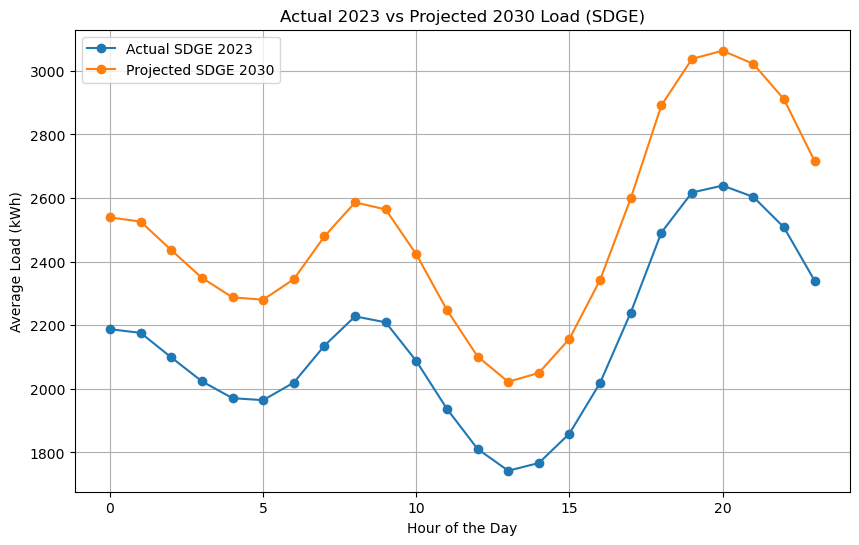

In [33]:
# comparison to show that the increase occured
# Group by hour to plot hourly patterns
actual_sdge_hourly = sdge_df.groupby('hour')['SDGE'].mean()
forecast_sdge_hourly = sdge_df.groupby('hour')['SDGE_2030'].mean()

plt.figure(figsize=(10, 6))
plt.plot(actual_sdge_hourly, label='Actual SDGE 2023', marker='o')
plt.plot(forecast_sdge_hourly, label='Projected SDGE 2030', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Load (kWh)')
plt.title('Actual 2023 vs Projected 2030 Load (SDGE)')
plt.legend()
plt.grid(True)
plt.show()

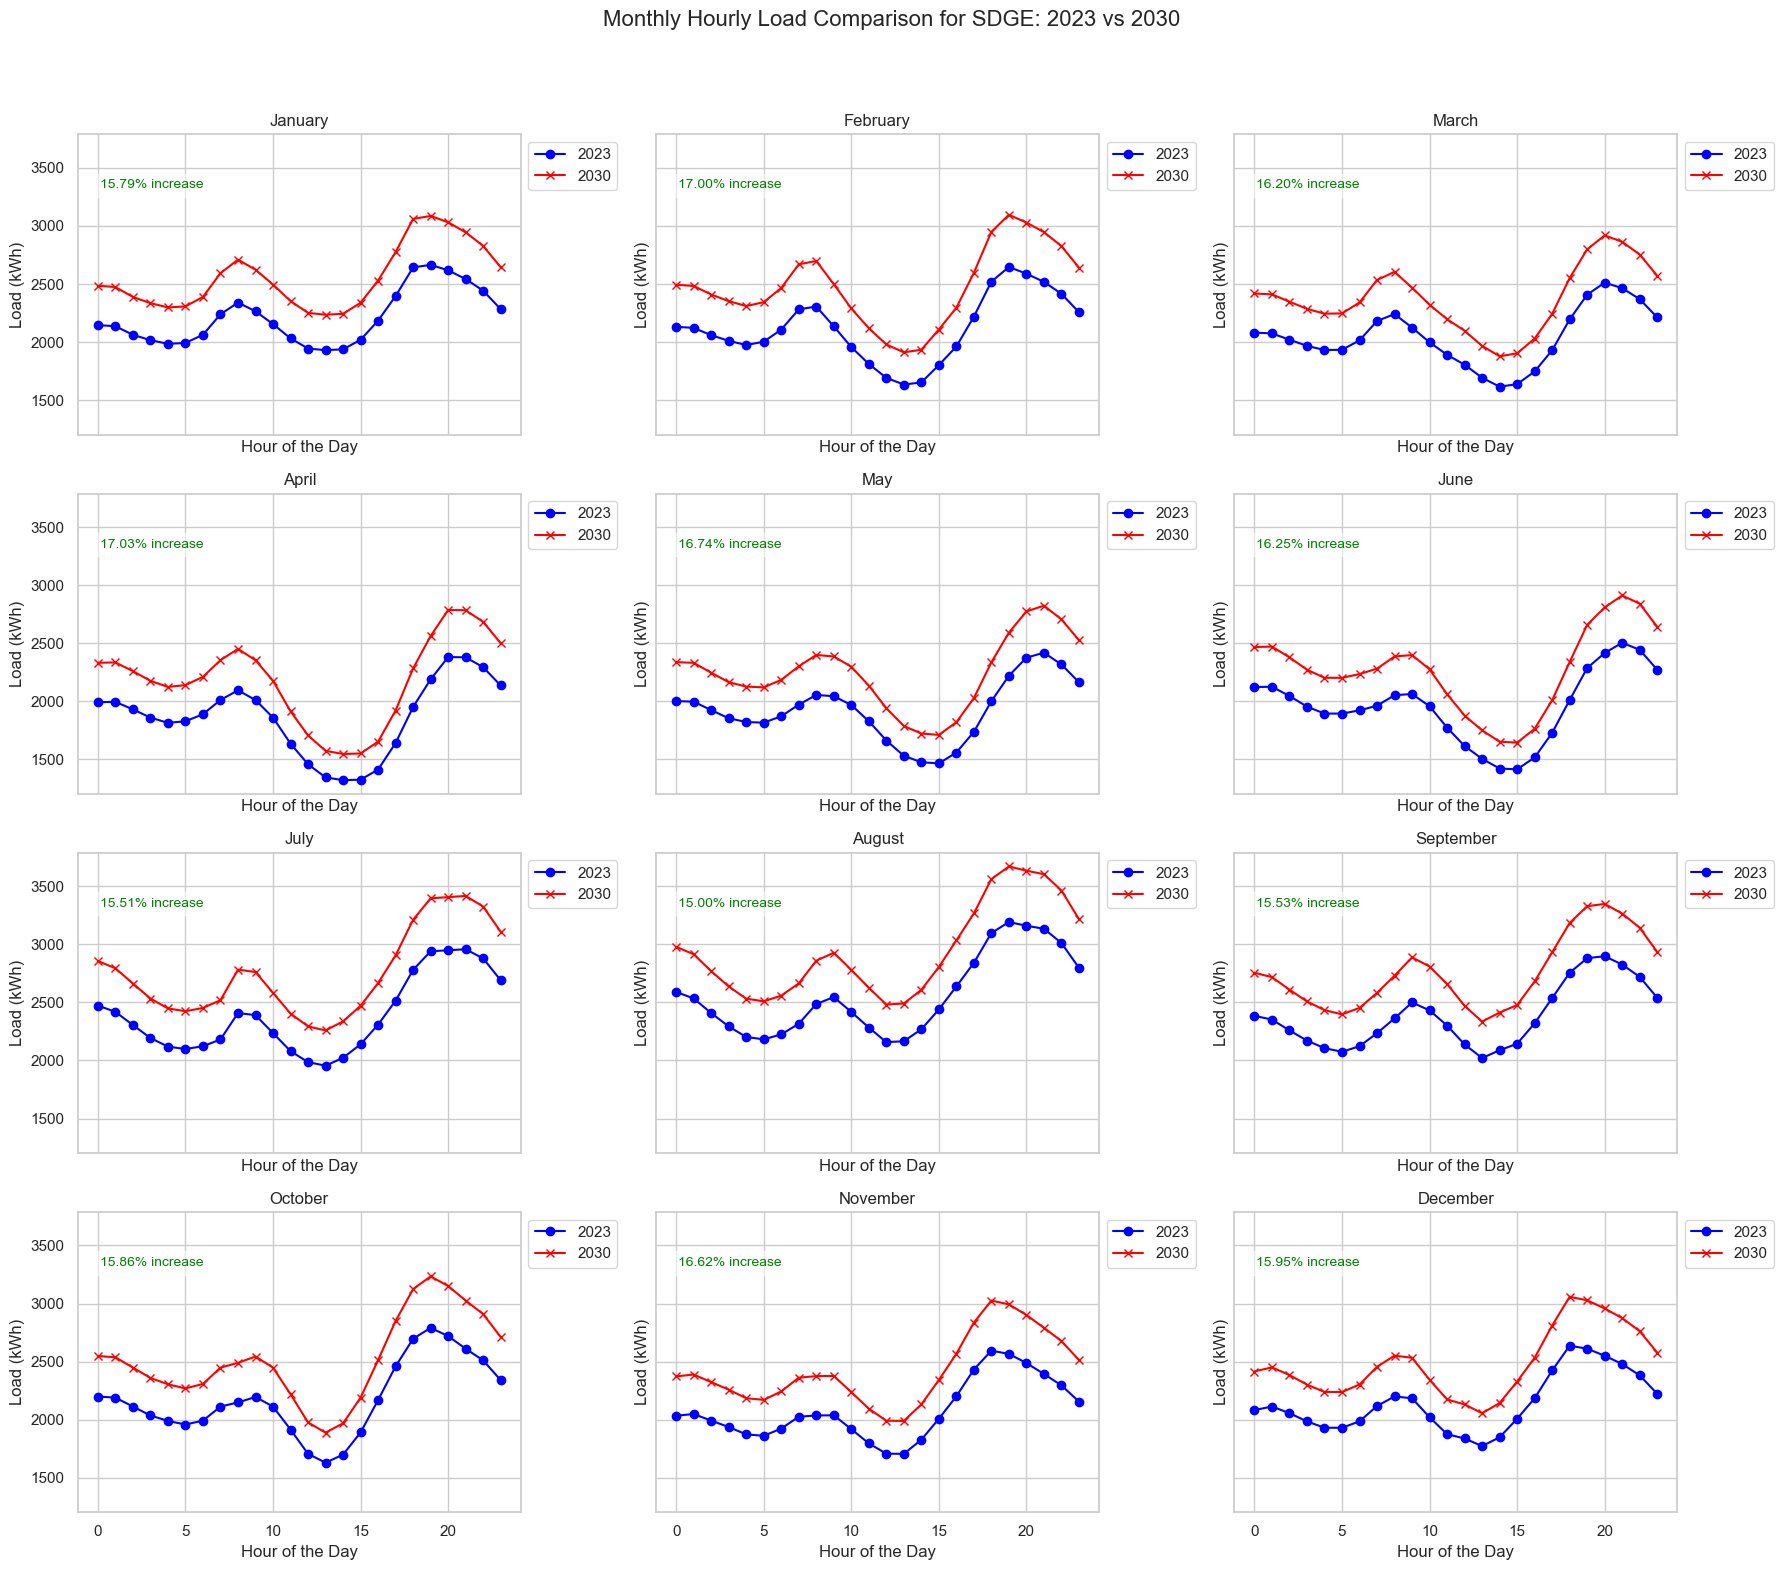

In [34]:
# Own percentage increase for each month
grouped_2023 = sdge_df.groupby(['month', 'hour'])['SDGE'].mean().unstack()
grouped_2030 = sdge_df.groupby(['month', 'hour'])['SDGE_2030'].mean().unstack()

# Plot settings
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16), sharex=True, sharey=True)
fig.suptitle('Monthly Hourly Load Comparison for SDGE: 2023 vs 2030', fontsize=16)

# Monthly percent increase values defined as before

# Iterate over each subplot
months = range(1, 13)
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
for ax, month in zip(axes.flatten(), months):
    ax.plot(grouped_2023.loc[month], label='2023', color='blue', marker='o')
    ax.plot(grouped_2030.loc[month], label='2030', color='red', marker='x')
    ax.set_title(month_names[month - 1])
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Load (kWh)')

    # Adjusting text position and legend
    perc_increase = percent_increase_2330[month]
    ax.text(0.05, 0.85, f'{perc_increase:.2f}% increase', transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='left', fontsize=10, color='green', bbox=dict(facecolor='white', alpha=0.5))
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))

# Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [35]:
#compute the percent increase directly
percent_increase_direct = (grouped_2030 - grouped_2023) / grouped_2023 * 100
print(percent_increase_direct)

hour          0          1          2          3          4          5   \
month                                                                     
1      15.793589  15.793589  15.793589  15.793589  15.793589  15.793589   
2      16.998009  16.998009  16.998009  16.998009  16.998009  16.998009   
3      16.197062  16.197062  16.197062  16.197062  16.197062  16.197062   
4      17.031160  17.031160  17.031160  17.031160  17.031160  17.031160   
5      16.743049  16.743049  16.743049  16.743049  16.743049  16.743049   
6      16.248719  16.248719  16.248719  16.248719  16.248719  16.248719   
7      15.510532  15.510532  15.510532  15.510532  15.510532  15.510532   
8      14.996496  14.996496  14.996496  14.996496  14.996496  14.996496   
9      15.533954  15.533954  15.533954  15.533954  15.533954  15.533954   
10     15.864160  15.864160  15.864160  15.864160  15.864160  15.864160   
11     16.619656  16.619656  16.619656  16.619656  16.619656  16.619656   
12     15.954942  15.9549

# Parameters


In [36]:
# Changing parameters here
part = .15 # participation % (0.05 - 0.25)
give = .70 # % willing to give (.50 - .90)
loss = .9 # loss transferring energy (lithium ion battery)
stor = (71.8 / 1000) * .2 # kwh storage of vehicle to mwh
BEV_Storage = stor * give 

In [37]:
sdge_30 = sdge_df[['Datetime','month','hour','SDGE_2030']]

In [38]:
sdge_30.dtypes

Datetime     datetime64[ns]
month                 int32
hour                  int32
SDGE_2030           float64
dtype: object

In [39]:
# Replace 'Datetime' with the correct column name if necessary
sdge_30['Datetime'] = pd.to_datetime(sdge_30['Datetime'], errors='coerce')

C:\Users\Eybar\AppData\Local\Temp\ipykernel_2556\1938900280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdge_30['Datetime'] = pd.to_datetime(sdge_30['Datetime'], errors='coerce')


In [40]:
ramp_up = (3670.316825 - 3266.028837) / 3670.316825 * 100
print(ramp_up)

11.015070558656745


# Calculations

In [41]:
# Ensure that the DateTime column is correctly formatted

# Filter for data in August 2030 using the `month` column
aug2030 = sdge_30[(sdge_30['month'] == 8)]

# Calculate mean for each hour across all days in August 2030
aug2030_mean = aug2030.groupby('hour').mean()['SDGE_2030']

# Filter further to calculate the mean for each hour between 6 pm and 10 pm
aug2030_peak = aug2030[(aug2030['hour'] >= 18) & (aug2030['hour'] <= 22)].groupby('hour').mean()['SDGE_2030']

# Display the results
print(aug2030_peak)

hour
18    3561.826534
19    3670.316825
20    3633.916724
21    3603.755740
22    3463.364308
Name: SDGE_2030, dtype: float64


In [42]:
# showing full aug_2030 mean
aug2030_mean

hour
0     2978.435584
1     2914.207074
2     2769.206508
3     2637.100388
4     2532.379015
5     2509.243945
6     2558.032878
7     2663.489116
8     2858.926032
9     2927.437606
10    2780.241720
11    2626.026226
12    2481.721945
13    2490.470582
14    2608.348667
15    2804.821665
16    3033.113821
17    3266.028837
18    3561.826534
19    3670.316825
20    3633.916724
21    3603.755740
22    3463.364308
23    3216.784370
Name: SDGE_2030, dtype: float64

In [43]:
# Function to calculate the V2G contribution and peak shave load
def calculate_peak_shave_load(peak, ev, part, BEV_Storage, loss):
    result = {}
    v2g = {}
    decrease_percentage = {}
    
    for hour in aug2030_peak.index:
        available_evs = ev.loc[ev['hour'] == hour, 'sd_ev_week2030'].values[0]
        BEV_Contribution_per_hour = available_evs * part
        V2G = BEV_Contribution_per_hour * BEV_Storage * loss
        Peak_shave_Load = aug2030_peak[hour] - V2G
        result[hour] = Peak_shave_Load
        v2g[hour] = V2G
        decrease_percentage[hour] = (peak[hour] - Peak_shave_Load) / peak[hour] * 100
    return pd.Series(result, name='Peak_shave_Load'), pd.Series(v2g, name='Vehicle_to_grid'), pd.Series(decrease_percentage, name='Decrease_Percentage')


# Calculate the Peak Shave Load
peak_shave_load, Vehicle_to_grid, decrease_percentage = calculate_peak_shave_load(aug2030_peak, ev, part, BEV_Storage, loss)
# Display the results
print("V2G Contribution per Hour:")
print(Vehicle_to_grid)
print("\nAug 2030 Peak Shave Load:")
print(peak_shave_load)
print("\nPeak Load Decrease Percentage:")
print(decrease_percentage)

V2G Contribution per Hour:
18    362.775973
19    400.891272
20    417.736873
21    429.818062
22    442.239566
Name: Vehicle_to_grid, dtype: float64

Aug 2030 Peak Shave Load:
18    3199.050561
19    3269.425552
20    3216.179851
21    3173.937678
22    3021.124742
Name: Peak_shave_Load, dtype: float64

Peak Load Decrease Percentage:
18    10.185111
19    10.922525
20    11.495499
21    11.926948
22    12.769074
Name: Decrease_Percentage, dtype: float64


In [44]:
# Create a new series for shaved load
aug2030_mean_shaved = aug2030_mean.copy()

# Update the shaved series with the new peak shave load values
aug2030_mean_shaved.update(peak_shave_load)

## Peak Shave Visualization

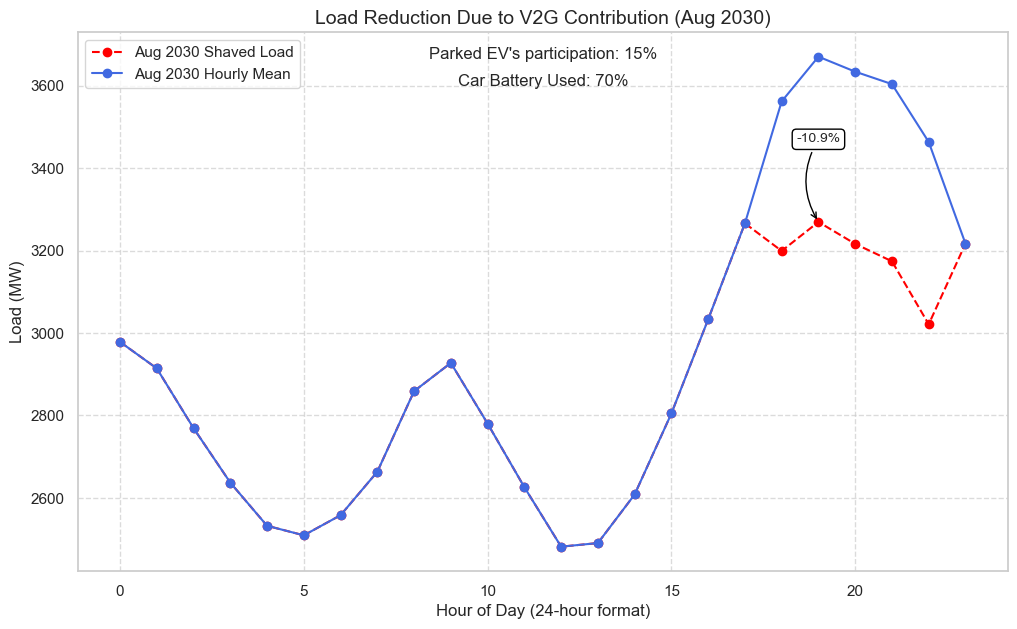

In [45]:
# Shaved load visualization
plt.figure(figsize=(12, 7))


# Dashed line plot for shaved load
plt.plot(aug2030_mean_shaved.index, aug2030_mean_shaved.values, label='Aug 2030 Shaved Load', marker='o', color='red', linestyle='--')

# Line plot for original load
plt.plot(aug2030_mean.index, aug2030_mean.values, label='Aug 2030 Hourly Mean', marker='o', color='royalblue')

# Calculate the percentage difference at 7 PM
hour = 19  # 7 PM in 24-hour format
percentage_change = ((aug2030_mean_shaved.values[hour] - aug2030_mean.values[hour]) / aug2030_mean.values[hour]) * 100

# placement of the annotation
mid_point = (aug2030_mean_shaved.values[hour] + aug2030_mean.values[hour]) / 2
plt.annotate(f'{percentage_change:.1f}%',
             xy=(hour, aug2030_mean_shaved.values[hour]), xytext=(hour, mid_point),
             arrowprops=dict(arrowstyle="->", color='black', connectionstyle='arc3,rad=.3'),
             ha='center', va='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))

# Add subheadings
plt.text(0.5, 0.95, f"Parked EV's participation: {15}%", transform=plt.gca().transAxes, ha='center', fontsize=12)
plt.text(0.5, 0.90, f"Car Battery Used: {70}%", transform=plt.gca().transAxes, ha='center', fontsize=12)

# Labels and Title
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Load (MW)', fontsize=12)
plt.title('Load Reduction Due to V2G Contribution (Aug 2030)', fontsize=14)

# Legend and Grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()